# import

In [1]:
import numpy as np
import cv2
import glob
from moviepy.editor import VideoFileClip
from IPython.display import HTML
# camera class

In [2]:
from camera import *
from line import *

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
%matplotlib inline

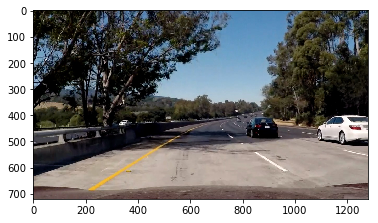

In [4]:
img = mpimage.imread('test_images/test5.jpg')
plt.imshow(img)

# camera calibration matrix and distortion 

511.890069736 m 568.656840008 m


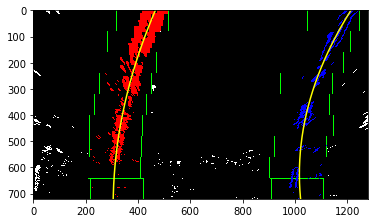

In [5]:
l = Line(img)

In [6]:
mtx, dist = l.mtx, l.dist

In [59]:
##  output the calibration and load

In [60]:
# calibration data will appear when example Line initial

# Apply a distortion correction to img

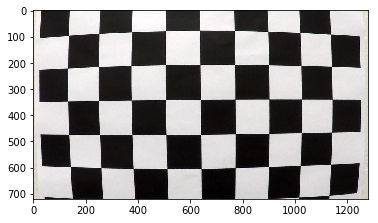

In [9]:
test_img = plt.imread(l.img_path[0])
plt.imshow(test_img)

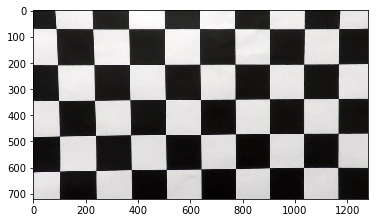

In [10]:
undist = l.undistort(test_img)
plt.imshow(undist)

# Use color transforms, gradients, etc., to create a thresholded binary image.

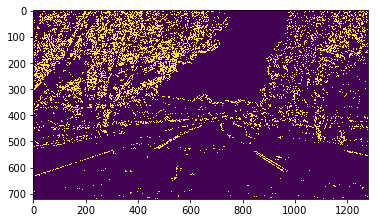

In [17]:
combined = l.combined_thresh()
plt.imshow(combined)

# Apply a perspective transform to rectify binary image ("birds-eye view").

In [18]:
l.update_M_and_Minv()

(array([[ -4.97409326e-01,  -1.52170409e+00,   9.58341969e+02],
        [ -4.88498131e-15,  -1.89844560e+00,   8.54300518e+02],
        [ -5.20417043e-18,  -2.37766264e-03,   1.00000000e+00]]),
 array([[  1.40625000e-01,  -8.01552644e-01,   5.50000000e+02],
        [ -3.33066907e-15,  -5.26746725e-01,   4.50000000e+02],
        [ -6.07153217e-18,  -1.25242601e-03,   1.00000000e+00]]))

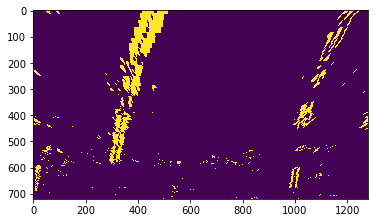

In [19]:
binary_top_down_image = l.transform_perspective(l.M)
plt.imshow(binary_top_down_image)

# Detect lane pixels and fit to find the lane boundary.

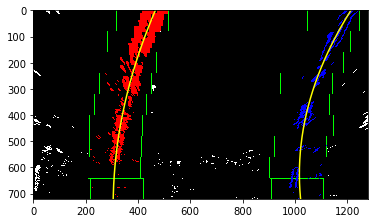

In [20]:
left_fit, right_fit = l.find_lines(figname= True)

# Determine the curvature of the lane and vehicle position with respect to center.

In [21]:
l.curvature()

484.188963905 m 561.346728319 m


(484.18896390494331, 561.34672831911394)

In [22]:
# distance from the center
l.distance_from_center()

1.0833333333333333

# Warp the detected lane boundaries back onto the original image.

In [18]:
result = l.display()

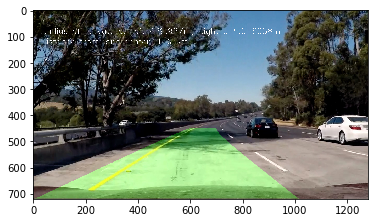

In [19]:
plt.imshow(result)

plt.savefig('test.png')

In [22]:
def pipeline(img):
    # todo
    # unit the fun name
    l = Line(img)
    l.combined_thresh() # when consistent?
    l.update_M_and_Minv()
    l.transform_perspective()
    l.find_lines(figname= True)
    l.curvature()
    l.distance_from_center()
    result = l.display() # need add text
    return(result)

584.045310334 m 548.631435747 m


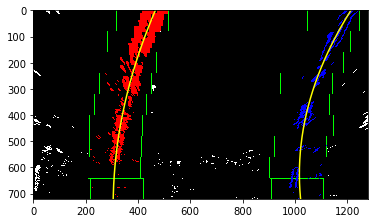

In [23]:
result = pipeline(img)

In [7]:
def pipeline(img):
    l = Line(img, auto=True)
    return(l.result)

# Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

533.336616236 m 536.528948182 m
[MoviePy] >>>> Building video ouput_project_video.mp4
[MoviePy] Writing video ouput_project_video.mp4


  4%|▍         | 1/26 [00:00<00:07,  3.18it/s]

566.150542216 m 508.266134862 m


  8%|▊         | 2/26 [00:00<00:07,  3.15it/s]

538.188505873 m 563.764827005 m


 12%|█▏        | 3/26 [00:01<00:07,  2.96it/s]

535.343230435 m 541.901847199 m


 15%|█▌        | 4/26 [00:01<00:07,  3.03it/s]

603.885017382 m 523.956525761 m


 19%|█▉        | 5/26 [00:01<00:06,  3.00it/s]

486.968690705 m 540.959960917 m


 23%|██▎       | 6/26 [00:02<00:06,  2.89it/s]

524.491631235 m 522.877332094 m


 27%|██▋       | 7/26 [00:02<00:06,  2.97it/s]

592.423233967 m 520.353537503 m


 31%|███       | 8/26 [00:02<00:05,  3.05it/s]

564.213376698 m 559.213819459 m


 35%|███▍      | 9/26 [00:03<00:05,  3.05it/s]

663.809520892 m 582.77727963 m


 38%|███▊      | 10/26 [00:03<00:05,  3.11it/s]

569.58957485 m 609.021030853 m


 42%|████▏     | 11/26 [00:03<00:04,  3.15it/s]

489.929245717 m 550.36894303 m


 46%|████▌     | 12/26 [00:03<00:04,  3.15it/s]

508.099141908 m 532.597030103 m


 50%|█████     | 13/26 [00:04<00:04,  3.16it/s]

573.04907721 m 643.352425392 m


 54%|█████▍    | 14/26 [00:04<00:03,  3.14it/s]

459.399734038 m 585.59228007 m


 58%|█████▊    | 15/26 [00:04<00:03,  3.08it/s]

639.446539441 m 533.969511854 m


 62%|██████▏   | 16/26 [00:05<00:03,  3.09it/s]

600.124287338 m 470.265711274 m


 65%|██████▌   | 17/26 [00:05<00:02,  3.10it/s]

630.762881262 m 576.908864181 m


 69%|██████▉   | 18/26 [00:05<00:02,  3.16it/s]

568.657815413 m 590.505816559 m


 73%|███████▎  | 19/26 [00:06<00:02,  3.14it/s]

549.894659665 m 597.470520704 m


 77%|███████▋  | 20/26 [00:06<00:01,  3.09it/s]

614.913484292 m 535.547658236 m


 81%|████████  | 21/26 [00:06<00:01,  2.94it/s]

484.714799815 m 474.079789524 m


 85%|████████▍ | 22/26 [00:07<00:01,  2.86it/s]

496.757529502 m 505.435478225 m


 88%|████████▊ | 23/26 [00:07<00:01,  2.90it/s]

583.982510256 m 498.962582903 m


 92%|█████████▏| 24/26 [00:07<00:00,  2.93it/s]

550.300143891 m 520.833780591 m


 96%|█████████▌| 25/26 [00:08<00:00,  2.95it/s]

585.86658776 m 536.636645416 m


[MoviePy] Done.
[MoviePy] >>>> Video ready: ouput_project_video.mp4 

CPU times: user 27 s, sys: 2.25 s, total: 29.3 s
Wall time: 8.84 s


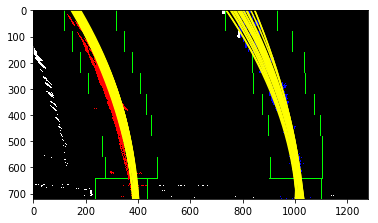

In [8]:
input_video = 'project_video.mp4'
clip = VideoFileClip(input_video).subclip(0,1)
# clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
output_clip = clip.fl_image(pipeline)
%time output_clip.write_videofile('ouput_' + input_video, audio=False)